# Load libraries

In [164]:
import numpy
from numpy import arange
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


# Load dataset

In [113]:
filename = ("train.csv")
dataset = read_csv(filename)



# Summarize Data
no of rows and coloumns

In [114]:
# Descriptive statistics
# shape
print(dataset.shape)

(333, 15)


In [115]:
# types
dataset.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [116]:
# head
dataset.head()
# descriptions, change precision to 2 places


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,6.3e-03,18.0,2.3,0,0.5,6.6,65.2,4.1,1,296,15.3,396.9,5.0,24.0
1,2,2.7e-02,0.0,7.1,0,0.5,6.4,78.9,5.0,2,242,17.8,396.9,9.1,21.6
2,4,3.2e-02,0.0,2.2,0,0.5,7.0,45.8,6.1,3,222,18.7,394.6,2.9,33.4
3,5,6.9e-02,0.0,2.2,0,0.5,7.1,54.2,6.1,3,222,18.7,396.9,5.3,36.2
4,7,8.8e-02,12.5,7.9,0,0.5,6.0,66.6,5.6,5,311,15.2,395.6,12.4,22.9



'RM' is the average number of rooms among homes in the neighborhood.
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.




                          

In [75]:
set_option('precision', 1)
dataset.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.0,3.3e+02,333.0,333.0,3.3e+02,333.0,333.0,333.0,333.0,333.0,333.0,333.0,333.0,333.0,333.0
mean,251.0,3.4e+00,10.7,11.3,6.0e-02,0.6,6.3,68.2,3.7,9.6,409.3,18.4,359.5,12.5,22.8
std,147.9,7.4e+00,22.7,7.0,2.4e-01,0.1,0.7,28.1,2.0,8.7,170.8,2.2,86.6,7.1,9.2
min,1.0,6.3e-03,0.0,0.7,0.0e+00,0.4,3.6,6.0,1.1,1.0,188.0,12.6,3.5,1.7,5.0
25%,123.0,7.9e-02,0.0,5.1,0.0e+00,0.5,5.9,45.4,2.1,4.0,279.0,17.4,376.7,7.2,17.4
50%,244.0,2.6e-01,0.0,9.9,0.0e+00,0.5,6.2,76.7,3.1,5.0,330.0,19.0,392.1,11.0,21.6
75%,377.0,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,93.8,5.1,24.0,666.0,20.2,396.2,16.4,25.0
max,506.0,7.4e+01,100.0,27.7,1.0e+00,0.9,8.7,100.0,10.7,24.0,711.0,21.2,396.9,38.0,50.0


In [118]:
# correlation
#set_option('precision', 2)
#dataset.corr(method='pearson')
dataset.corr()['medv']

ID        -0.2
crim      -0.4
zn         0.3
indus     -0.5
chas       0.2
nox       -0.4
rm         0.7
age       -0.4
dis        0.2
rad       -0.4
tax       -0.4
ptratio   -0.5
black      0.3
lstat     -0.7
medv       1.0
Name: medv, dtype: float64

In [126]:
highly_correlated_features = dataset.columns[dataset.corr()['medv'].abs() > .4]

highly_correlated_features


Index(['crim', 'indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat', 'medv'], dtype='object')

From Correlation data,
We can confim that variable  LSTAT, RM, AGE and PTRATIO have good corelation with our output variable MEDV.
These variables we need to consider when we optimze our predictive value

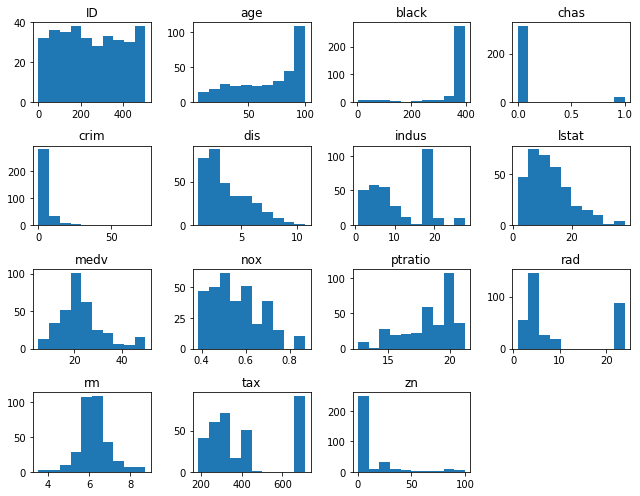

In [127]:
# Data visualizations

# histograms
dataset.hist(bins=10,figsize=(9,7),grid=False)
plt.tight_layout();

We can see that some variables  have an exponential or skewed form of distribution, such as CRIM, black, ZN and Age. We can see that others  have a bimodal distribution such as RAD and TAX.

I do feel features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
Analysis from above  data:
1)increase in RM value increases MEDV value ie price of the home.
2) Lower the value of LSTAT higher the value of MEDV
3) PTRATIO decrease in the value increases MEDV

In [128]:
dataset.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [136]:
less_correlated_features = [feature for feature in dataset.columns if feature not in highly_correlated_features]

In [137]:
prices = dataset['medv']
dataset = dataset.drop(less_correlated_features, axis = 1)
features = dataset.drop('medv', axis = 1)
dataset.head()
#features.head()

,crim,indus,nox,rm,tax,ptratio,lstat,medv
0,6.3e-03,2.3,0.5,6.6,296,15.3,5.0,24.0
1,2.7e-02,7.1,0.5,6.4,242,17.8,9.1,21.6
2,3.2e-02,2.2,0.5,7.0,222,18.7,2.9,33.4
3,6.9e-02,2.2,0.5,7.1,222,18.7,5.3,36.2
4,8.8e-02,7.9,0.5,6.0,311,15.2,12.4,22.9


In [138]:
dataset.columns

Index(['crim', 'indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat', 'medv'], dtype='object')

C:\Users\Opeyemi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


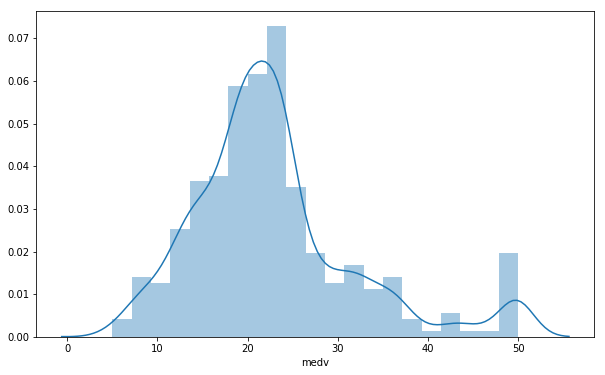

In [57]:
#histogram
sns.distplot(dataset['medv']);

MEDV is Deviated from the normal distribution, have appreciable positive skewness and showed peakedness.

Multivariate Visualization

From my analysis, Price increases with RM and Price decreases with increase in PTRATO and LSTAT



 

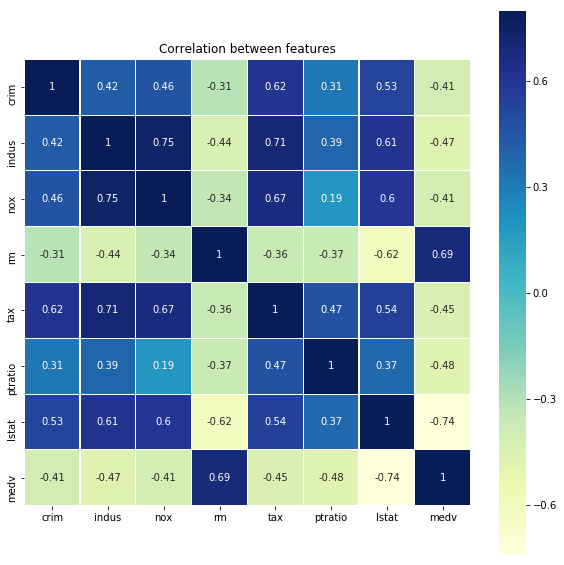

In [139]:
corr=dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

Variables having strong Corelation with target varible MEDV are RM (.7), LSTAT(-.74), PTRATIO(-.51) 

Check for Missing Value

Feature Engineering

1)  Data Standardization

The point here is to test 'MEDV' (Price) in a very lean way. We'll do this paying attention to:
Histogram - Kurtosis and skewness.
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

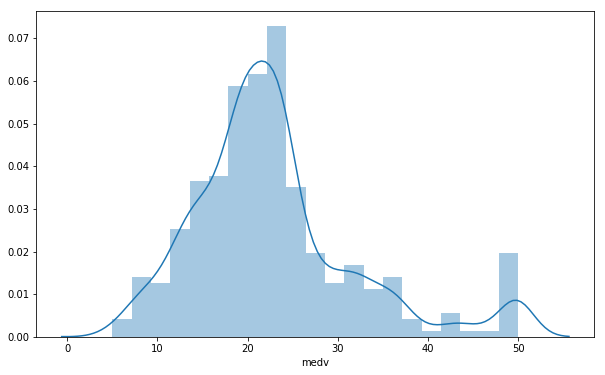

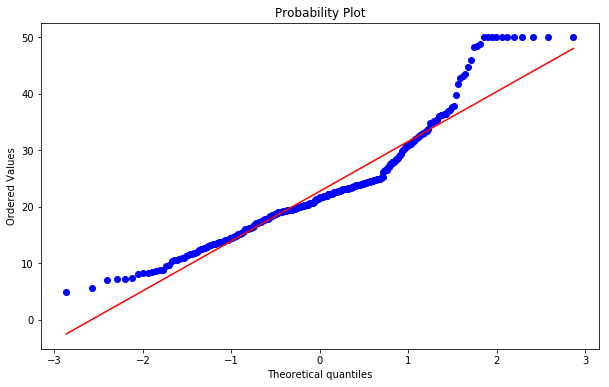

In [96]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(dataset['medv'], hist=True);
fig = plt.figure()
res = stats.probplot(dataset['medv'], plot=plt)

In [140]:
dataset.head()

,crim,indus,nox,rm,tax,ptratio,lstat,medv
0,6.3e-03,2.3,0.5,6.6,296,15.3,5.0,24.0
1,2.7e-02,7.1,0.5,6.4,242,17.8,9.1,21.6
2,3.2e-02,2.2,0.5,7.0,222,18.7,2.9,33.4
3,6.9e-02,2.2,0.5,7.1,222,18.7,5.3,36.2
4,8.8e-02,7.9,0.5,6.0,311,15.2,12.4,22.9


 It shows 'peakedness', positive skewness and does not follow the diagonal line.
 A simple data transformation can solve the problem.  Will do in by standardizing the data

# Prepare Data

In [147]:
# Split-out validation dataset
X = dataset.drop(['medv'],axis=1)
y= dataset['medv']
validation_size = 0.20
seed = 7
X_train, X_validation, ytrain, yvalidation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



In [148]:
X_train.shape, X_validation.shape

((266, 7), (67, 7))

Evaluate Algorithm

In [168]:
# Test options and evaluation metric using Root Mean Square error method
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'


In [169]:
from sklearn.metrics import r2_score

In [155]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [156]:
models

[('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False)),
 ('LASSO', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
     normalize=False, positive=False, precompute=False, random_state=None,
     selection='cyclic', tol=0.0001, warm_start=False)),
 ('EN', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
        max_iter=1000, normalize=False, positive=False, precompute=False,
        random_state=None, selection='cyclic', tol=0.0001, warm_start=False)),
 ('KNN',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform')),
 ('CART',
  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
           

# evaluate each model in turn

In [175]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    results.append(abs(cv_results))
    names.append(name)
    msg = '{}: {} {}'.format(name, abs(cv_results.mean()), abs(cv_results.std()))
    print(msg)

LR: 30.009863332784683 12.894675276224817
LASSO: 32.757045570114066 14.040314422795563
EN: 32.305157118558675 13.662143565696967
KNN: 27.057588660968655 10.615297501773895
CART: 28.896260683760687 18.86504065989173
SVR: 66.84749716675023 24.22267823363084


In [173]:
names

['LR', 'LASSO', 'EN', 'KNN', 'CART', 'SVR']

In [176]:
results

[array([56.98387629, 29.598398  , 38.06406208, 23.04636244, 19.74646597,
        46.03244341, 11.30087975, 28.19278873, 20.16213186, 26.97122479]),
 array([57.6473247 , 21.5947701 , 42.42429069, 27.58652553, 21.00703227,
        45.54214549, 11.61041345, 46.81755261, 20.09398846, 33.24641239]),
 array([57.4089932 , 21.20761962, 41.82172513, 27.53791799, 20.46871268,
        45.9351741 , 12.2026497 , 43.28780288, 20.11093827, 33.07003763]),
 array([31.8102963 , 19.58943704, 37.53914074, 20.83268148, 32.00019259,
        42.1088    , 11.94978462, 41.15150769, 14.40323077, 19.19081538]),
 array([40.77185185, 62.4337037 , 61.3337037 , 17.09851852, 14.08592593,
        15.09851852, 35.22423077, 13.045     , 17.27038462, 12.60076923]),
 array([ 92.2204899 ,  68.94116891,  82.20812137,  41.1486852 ,
         66.08147871,  70.38264608,  40.7067714 , 107.32232989,
         23.25247227,  76.21080794])]

# Compare Algorithms

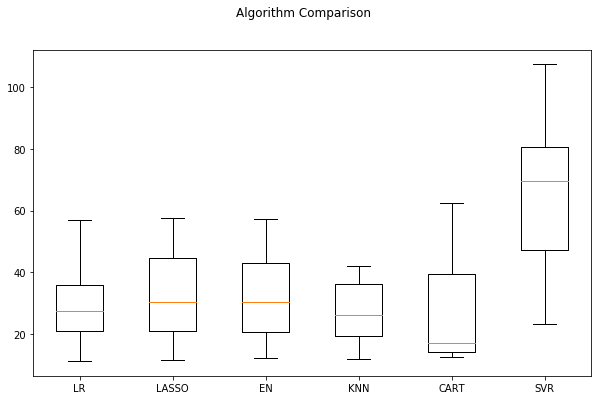

In [179]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Standardize the dataset


In [181]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    results.append(abs(cv_results))
    names.append(name)
    msg = "%s: %f (%f)" % (name, abs(cv_results.mean()), abs(cv_results.std()))
    print(msg)


ScaledLR: 30.009863 (12.894675)
ScaledLASSO: 30.843329 (14.119841)
ScaledEN: 33.305956 (16.203906)
ScaledKNN: 18.350034 (11.114598)
ScaledCART: 29.672527 (17.243786)
ScaledSVR: 31.956308 (16.500349)


# Compare Algorithms

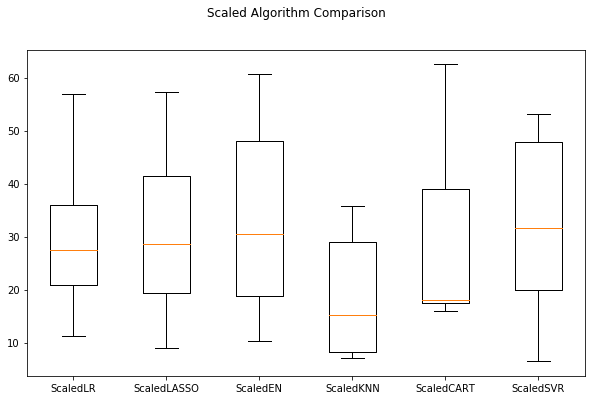

In [182]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



# KNN Algorithm tuning

In [183]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
dataset.shape

Best: -15.319219 using {'n_neighbors': 3}
-21.782970 (13.813830) with: {'n_neighbors': 1}
-15.319219 (7.415013) with: {'n_neighbors': 3}
-18.419989 (11.272627) with: {'n_neighbors': 5}
-19.116678 (11.517209) with: {'n_neighbors': 7}
-20.388584 (12.562207) with: {'n_neighbors': 9}
-21.748078 (13.314252) with: {'n_neighbors': 11}
-22.617257 (14.054526) with: {'n_neighbors': 13}
-23.405593 (14.405183) with: {'n_neighbors': 15}
-24.614819 (15.363955) with: {'n_neighbors': 17}
-26.017248 (15.847730) with: {'n_neighbors': 19}
-26.870841 (16.179320) with: {'n_neighbors': 21}


(333, 8)

# ensembles

In [ ]:
ensembles = []
ensembles.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
dataset.shape

When we compare, GBM has better accuracy than KNN

# Compare Algorithms

In [ ]:
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

So Our chosen Algorithm is GBM and letz tune

# Tune scaled GBM

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



# Make predictions on validation dataset
Our Model is ready for predition with our Validation set

In [ ]:

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))


In [ ]:


predictions=predictions.astype(int)
submission = pd.DataFrame({
        "Org House Price": Y_validation,
        "Pred House Price": predictions
    })

submission.to_csv("PredictedPrice.csv", index=False)
